In [86]:
import csv
import pandas as pd
import xml.etree.ElementTree as et
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from datetime import datetime as dt

### Leer fichero F24 con datos de un partido reemplazar el nombre aquí

In [87]:
tree = et.ElementTree(file = "f24-23-2018-1009569-eventdetails.xml")
games = tree.getroot()

In [88]:
match_details = games[0].attrib
match_details

{'id': '1009569',
 'away_score': '0',
 'away_team_id': '855',
 'away_team_name': 'Levante',
 'competition_id': '23',
 'competition_name': 'Spanish La Liga',
 'game_date': '2019-03-04T20:00:00',
 'home_score': '1',
 'home_team_id': '957',
 'home_team_name': 'Leganés',
 'matchday': '26',
 'period_1_start': '2019-03-04T20:01:04',
 'period_2_start': '2019-03-04T21:01:40',
 'season_id': '2018',
 'season_name': 'Season 2018/2019'}

### Archivo de Plantillas

In [89]:
tree3 = et.ElementTree(file = "srml-23-2018-squads.xml")
soccerfeed = tree3.getroot()

In [90]:
player_ids = []
player_names = []

for child in soccerfeed:
    for grchild in child:
        if grchild.tag == "Team":
            for grgrchild in grchild:
                if grgrchild.tag == "Player":
                    player_ids.append(grgrchild.attrib["uID"].lstrip('p'))                     
                    for kchild in grgrchild:
                            if kchild.tag == "Name":
                                player_names.append(kchild.text)
                        
player_dict = dict(zip(player_ids, player_names))

In [91]:
list(player_dict.items())[:10]

[('91406', 'Fernando Pacheco'),
 ('176245', 'Antonio Sivera'),
 ('439750', 'Álex Domínguez'),
 ('167539', 'Carlos Vigaray'),
 ('126119', 'Rubén Duarte'),
 ('93421', 'Rodrigo Ely'),
 ('49370', 'Víctor Laguardia'),
 ('155335', 'Guillermo Maripán'),
 ('90728', 'Ximo Navarro'),
 ('178873', 'Adrián Marín')]

### Resumen previo del partido

In [92]:
print ("%s v %s, %s %s" % (match_details["home_team_name"],
                          match_details["away_team_name"],
                          match_details["competition_name"][8:],
                          match_details["season_name"][7:]))


print ("Date: %s" % dt.strftime(dt.strptime(match_details["game_date"], '%Y-%m-%dT%H:%M:%S'),
                               "%A %d %B %Y"))

print ("Kick-off: %s" % dt.strftime(dt.strptime(match_details["game_date"], '%Y-%m-%dT%H:%M:%S'),
                               "%I%p").lstrip("0"))

Leganés v Levante, La Liga 2018/2019
Date: Monday 04 March 2019
Kick-off: 8PM


#### Diccionarios de los equipos

In [93]:
team_dict = {match_details["home_team_id"]: match_details["home_team_name"],
             match_details["away_team_id"]: match_details["away_team_name"]}

print(team_dict)

{'957': 'Leganés', '855': 'Levante'}


### Pases

In [94]:
# PASSES

passes_x = []
passes_y = []
passes_outcome = []
passes_min = []
passes_sec = []
passes_period = []
passes_team = []
passes_x_end = []
passes_y_end = []
passes_length = []
passes_angle = []
passes_zone = []
pass_real = []
pass_player = []

for game in games:
    for event in game:
        
        if event.attrib.get("type_id") == '1':
            
            passes_x.append(event.attrib.get("x"))
            passes_y.append(event.attrib.get("y"))
            passes_outcome.append(event.attrib.get("outcome"))
            passes_min.append(event.attrib.get("min"))
            passes_sec.append(event.attrib.get("sec"))
            passes_period.append(event.attrib.get("period_id"))
            passes_team.append(team_dict[event.attrib.get("team_id")])
            pass_player.append(player_dict[event.attrib.get("player_id")])
            
            for q in event:
                
                qualifier = q.attrib.get("qualifier_id")
                
                if qualifier == "140":
                    passes_x_end.append(q.attrib.get("value"))
                if qualifier == "141":
                    passes_y_end.append(q.attrib.get("value"))
                if qualifier == "212":
                    passes_length.append(q.attrib.get("value"))
                if qualifier == "213":
                    passes_angle.append(q.attrib.get("value"))
                if qualifier == "56":
                    passes_zone.append(q.attrib.get("value"))
                    
                             
passes_df = np.array(list(zip(passes_team, pass_player, passes_period, passes_min, passes_sec, passes_zone, passes_x, 
                        passes_y, passes_x_end, passes_y_end, passes_length, passes_angle,passes_outcome)))

print (passes_df)

fieldnames = ["team", "player", "period", "min", "sec", "pass zone", "x", "y", "x_end", "y_end",
              "pass length", "pass angle", "outcome"]

with open("pass_data_%s_%s.csv" % (match_details["home_team_name"], match_details["away_team_name"]),"w",newline='') as passes_csv:
        csv_file = csv.writer(passes_csv)
        csv_file.writerow(fieldnames)
        for i in range(len(passes_df)):
            csv_file.writerow(passes_df[i])

[['Leganés' 'Óscar Rodríguez' '1' ... '21.8' '2.7' '1']
 ['Leganés' 'Dimitrios Siovas' '1' ... '50.0' '5.4' '0']
 ['Levante' 'Antonio Luna' '1' ... '14.2' '5.8' '0']
 ...
 ['Levante' 'Aitor Fernández' '2' ... '47.7' '0.5' '1']
 ['Levante' 'José Campaña' '2' ... '21.6' '0.1' '1']
 ['Levante' 'Antonio Luna' '2' ... '31.8' '5.3' '1']]


In [95]:
passes_df

array([['Leganés', 'Óscar Rodríguez', '1', ..., '21.8', '2.7', '1'],
       ['Leganés', 'Dimitrios Siovas', '1', ..., '50.0', '5.4', '0'],
       ['Levante', 'Antonio Luna', '1', ..., '14.2', '5.8', '0'],
       ...,
       ['Levante', 'Aitor Fernández', '2', ..., '47.7', '0.5', '1'],
       ['Levante', 'José Campaña', '2', ..., '21.6', '0.1', '1'],
       ['Levante', 'Antonio Luna', '2', ..., '31.8', '5.3', '1']],
      dtype='<U18')

In [96]:
passes = pd.DataFrame(passes_df,columns=["team", "player", "period", "min", "sec", "pass zone", "x", "y", "x_end", "y_end",
              "pass length", "pass angle", "outcome"])

In [97]:
passes['period'] = passes['period'].astype('int64')
passes['min'] = passes['min'].astype('int64')
passes['sec'] = passes['sec'].astype('int64')
passes['x'] = passes['x'].astype('float64')
passes['y'] = passes['y'].astype('float64')
passes['x_end'] = passes['x_end'].astype('float64')
passes['y_end'] = passes['y_end'].astype('float64')
passes['pass length'] = passes['pass length'].astype('float64')
passes['pass angle'] = passes['pass angle'].astype('float64')
passes['outcome'] = passes['outcome'].astype('int64')

In [98]:
passes.dtypes

team            object
player          object
period           int64
min              int64
sec              int64
pass zone       object
x              float64
y              float64
x_end          float64
y_end          float64
pass length    float64
pass angle     float64
outcome          int64
dtype: object

In [99]:
passes[:50]

,team,player,period,min,sec,pass zone,x,y,x_end,y_end,pass length,pass angle,outcome
0,Leganés,Óscar Rodríguez,1,0,1,Back,49.8,50.6,30.6,62.9,21.8,2.7,1
1,Leganés,Dimitrios Siovas,1,0,5,Right,30.6,62.9,60.8,6.1,50.0,5.4,0
2,Levante,Antonio Luna,1,0,8,Left,39.4,95.1,51.2,84.8,14.2,5.8,0
3,Leganés,Rubén Pérez,1,0,9,Back,45.8,24.0,43.3,3.4,14.3,4.5,1
4,Leganés,Allan Nyom,1,0,11,Back,43.3,3.4,22.5,7.4,22.0,3.0,1
5,Leganés,Diego Reyes,1,0,13,Back,22.5,7.4,6.1,30.0,23.1,2.4,1
6,Leganés,Iván Cuéllar,1,0,15,Back,6.1,30.0,45.1,30.3,41.0,0.0,0
7,Levante,José Campaña,1,0,17,Center,57.6,67.8,68.5,74.8,12.4,0.4,0
8,Leganés,Allan Nyom,1,0,18,Back,35.4,27.7,37.8,31.6,3.7,0.8,1
9,Levante,Enis Bardhi,1,0,21,Center,65.2,65.8,53.3,34.0,25.0,4.2,1


In [101]:
def pintar_pases():
    fig=plt.figure()
    fig.set_size_inches(12, 9) # Cambiar aqui el tamaño (Ancho, Alto)
    ax=fig.add_subplot(1,1,1)
    
    # Pitch Outline & Centre Line OK
    plt.plot([0,0],[0,100], color="black")
    plt.plot([0,100],[100,100], color="black") #upper line x_start x_end y_start y_end
    plt.plot([100,100],[100,0], color="black")
    plt.plot([100,0],[0,0], color="black")
    plt.plot([50,50],[0,100], color="black")
    
    # Left Penalty Area OK
    plt.plot([17,17],[78.9,21.1],color="black")
    plt.plot([0,17],[78.9,78.9],color="black")
    plt.plot([17,0],[21.1,21.1],color="black")
    
    # Right Penalty Area OK
    plt.plot([100,83],[78.9,78.9],color="black")
    plt.plot([83,83],[78.9,21.1],color="black")
    plt.plot([83,100],[21.1,21.1],color="black")
    
    # Left 6-yard Box on testing
    plt.plot([0,5.8],[63.2,63.2],color="black")
    plt.plot([5.8,5.8],[63.2,36.8],color="black")
    plt.plot([5.8,0],[36.8,36.8],color="black")
    
    # Right 6-yard Box on testing
    plt.plot([100,94.2],[63.2,63.2],color="black")
    plt.plot([94.2,94.2],[63.2,36.8],color="black")
    plt.plot([94.2,100],[36.8,36.8],color="black")
    
    # Prepare Circles OK
    centreCircle = plt.Circle((50,50),9.15,color="black",fill=False)
    centreSpot = plt.Circle((50,50),0.7,color="black")
    leftPenSpot = plt.Circle((11.5,50),0.7,color="black")
    rightPenSpot = plt.Circle((88.5,50),0.7,color="black")
    
    # Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    # Prepare Arcs based on penalty Spots 
    leftArc = Arc((11.5,50),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((88.5,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")
    
    # leftArc = Arc((17,50),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="blue")
    # rightArc = Arc((83,50),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="red")
    
    # Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    # Tidy Axes
    plt.axis('off')
    
    ####################
    # PLOT PASSES
    ####################
    
    for i in range(len(pasesJugador)):
        color = "green" if pasesJugador.iloc[i]['outcome'] == 1 else "red"
        plt.plot([int(pasesJugador["x"][i]),int(pasesJugador["x_end"][i])],
                 [int(pasesJugador["y"][i]),int(pasesJugador["y_end"][i])], color=color)
        plt.plot(int(pasesJugador["x"][i]),int(pasesJugador["y"][i]),"o", color=color)
    
    
    #Display Pitch
    # plt.tight_layout()
    plt.show()

Óscar Rodríguez


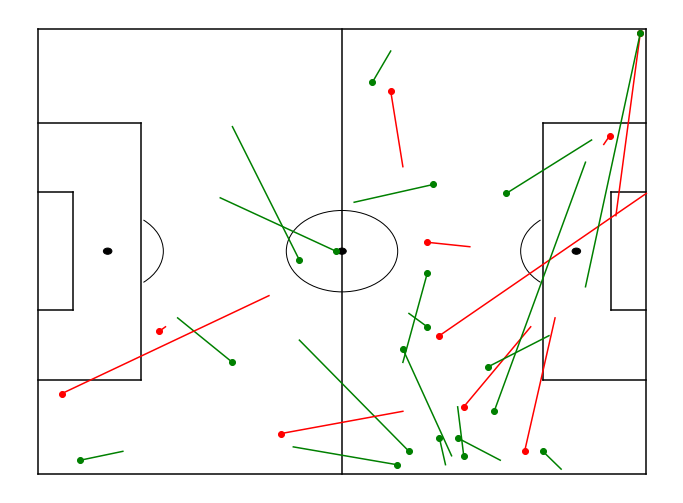

Dimitrios Siovas


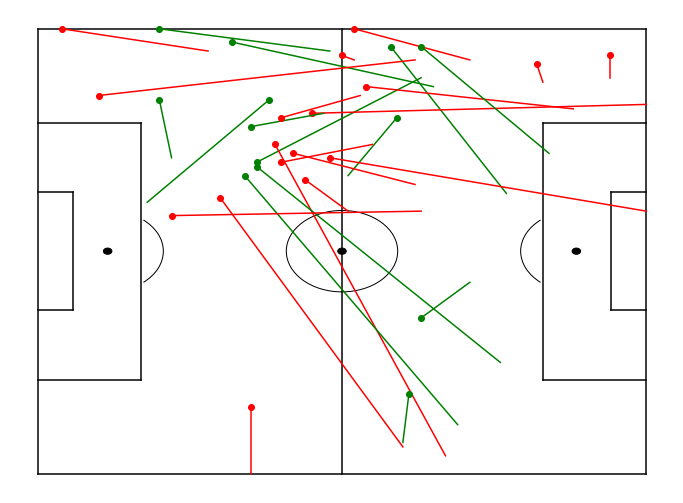

Antonio Luna


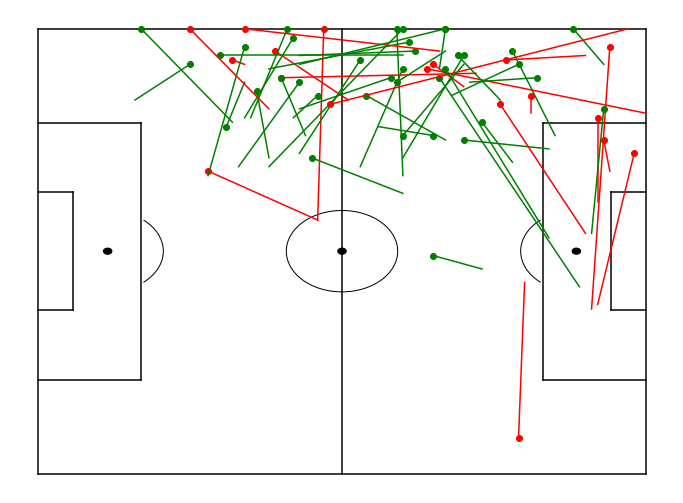

Rubén Pérez


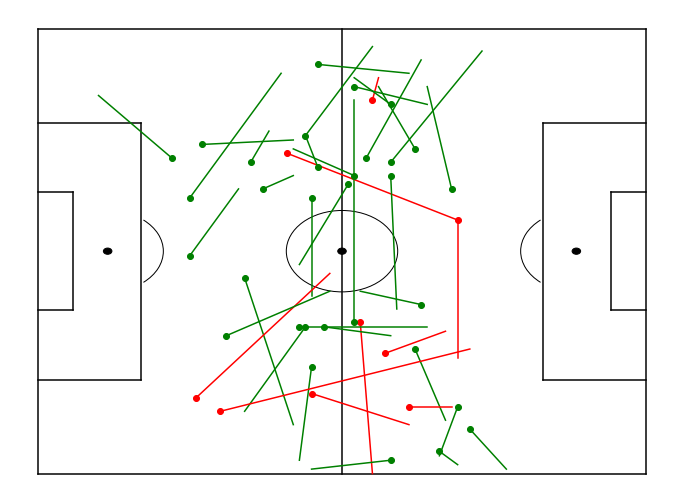

Allan Nyom


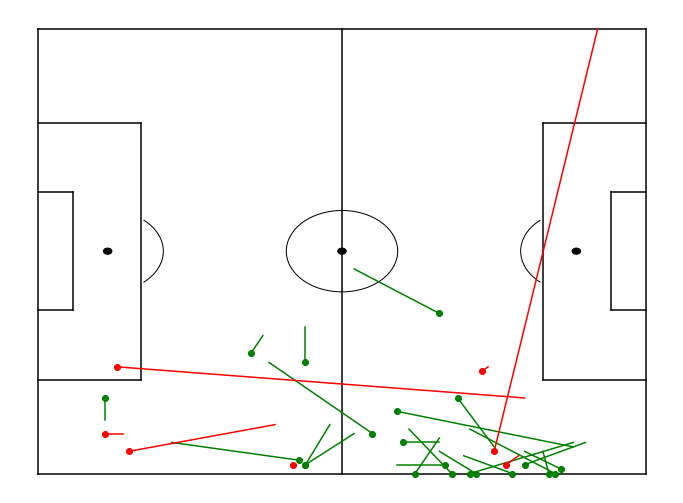

Diego Reyes


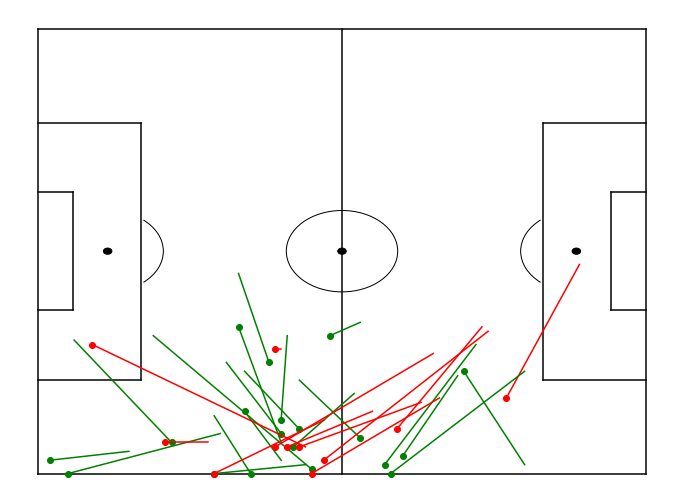

Iván Cuéllar


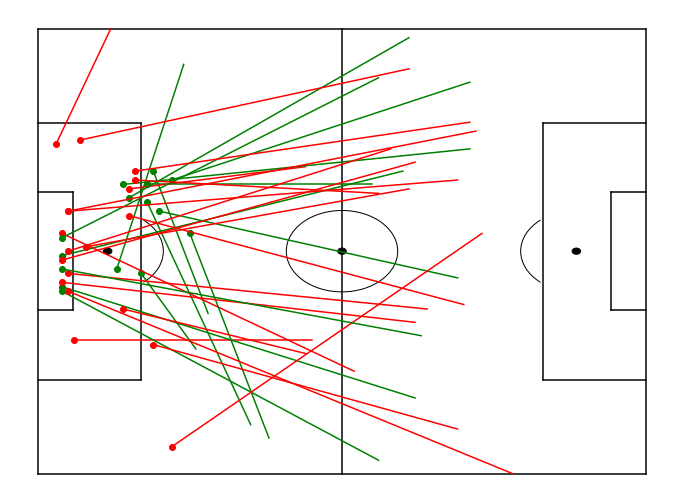

José Campaña


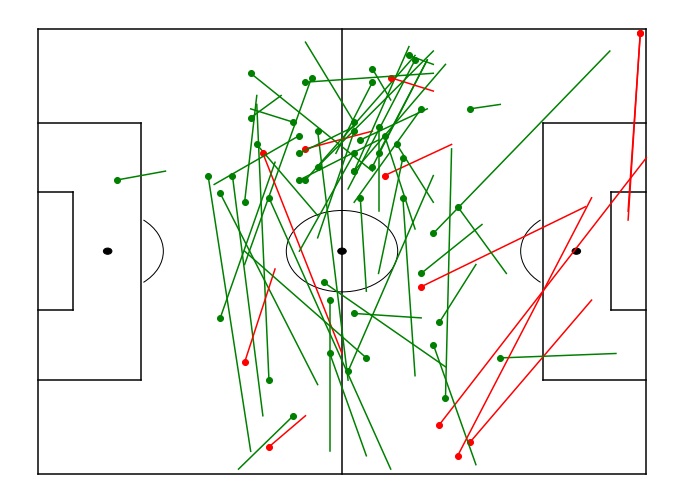

Enis Bardhi


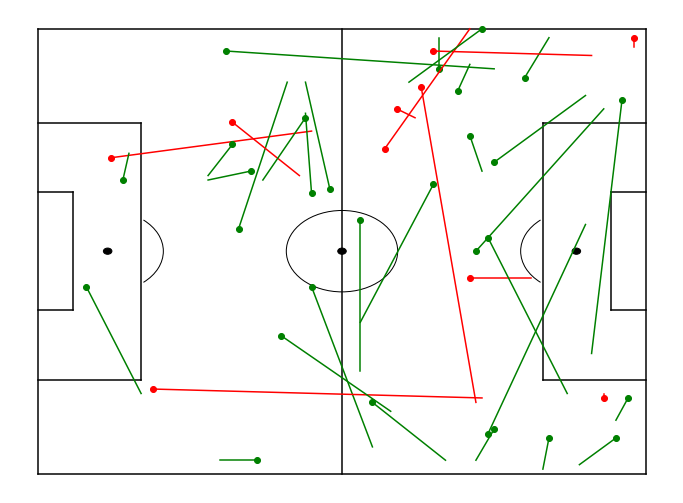

Erick Cabaco


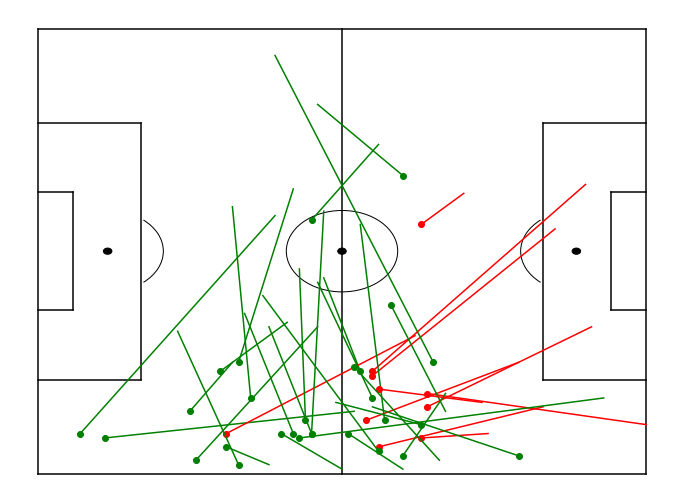

Guido Carrillo


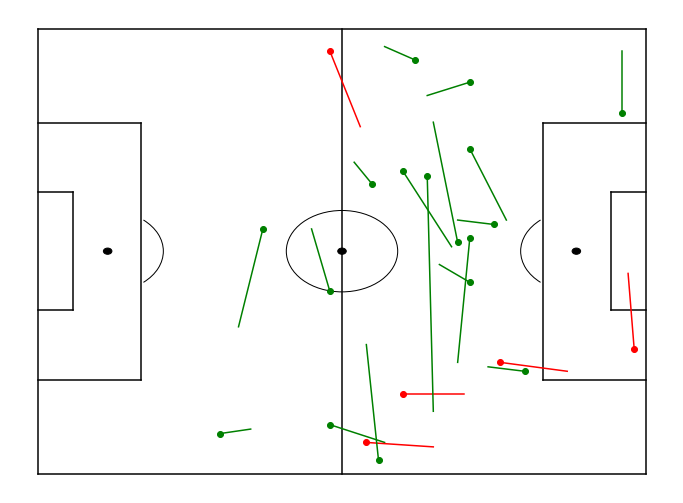

Rober Pier


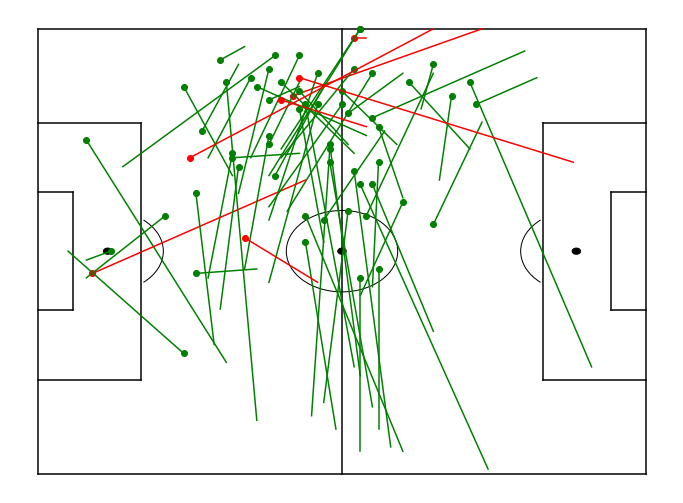

Rúben Vezo


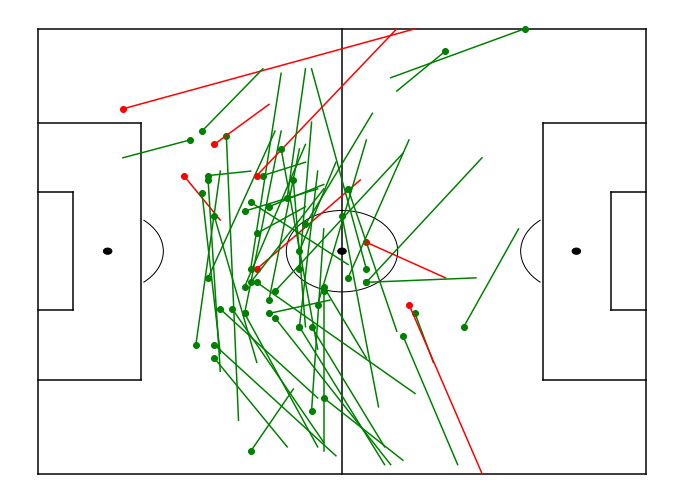

Recio


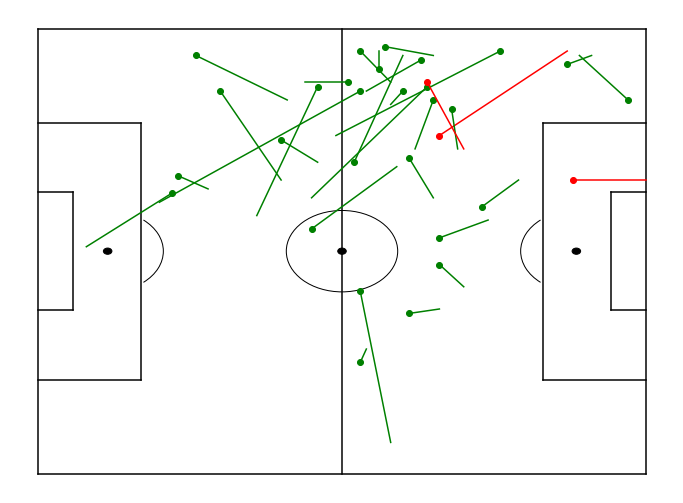

Kenneth Omeruo


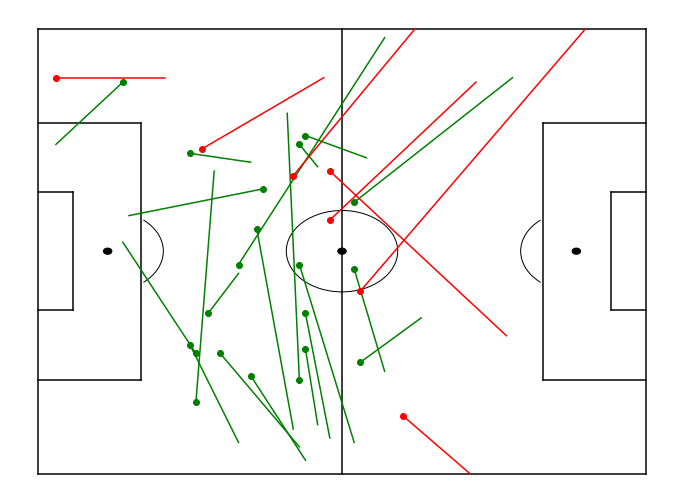

Aitor Fernández


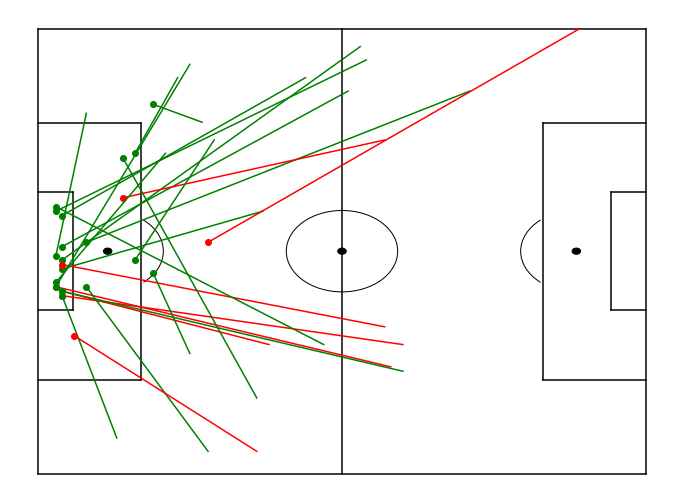

Borja Mayoral


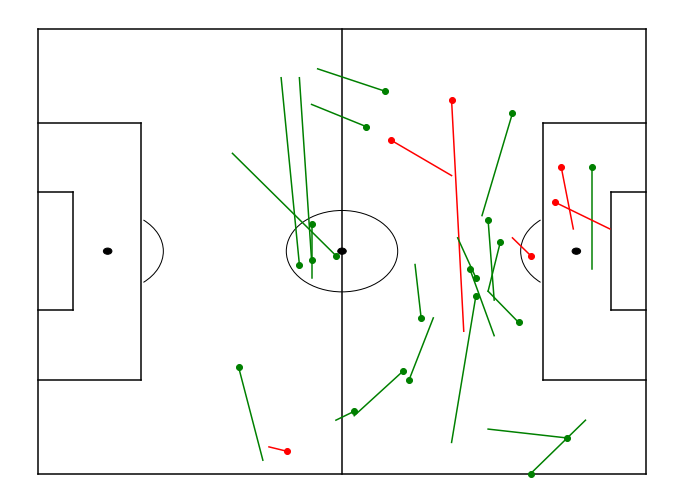

Vasyl Kravets


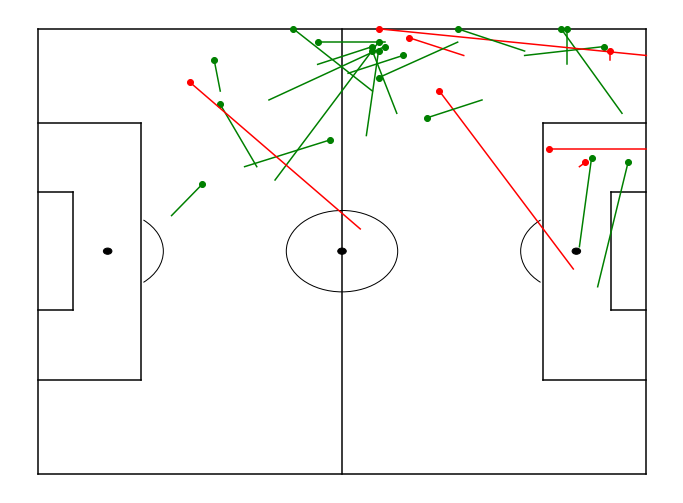

Moses Simon


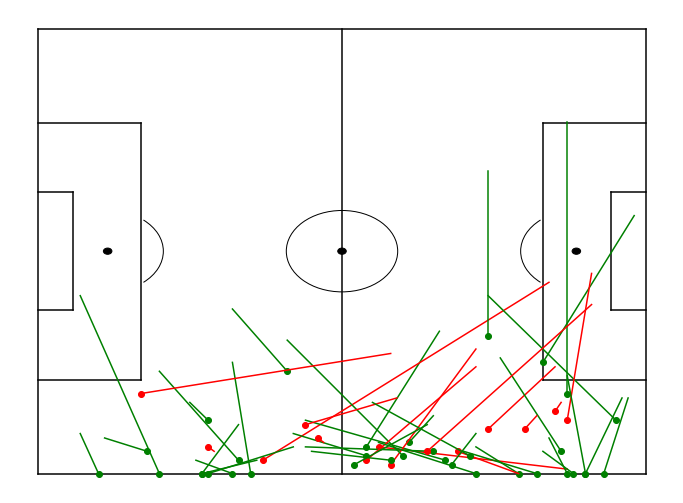

Martin Braithwaite


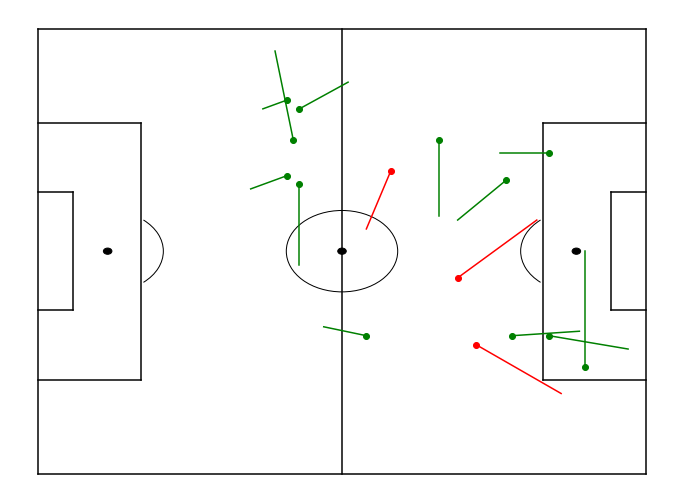

Jason


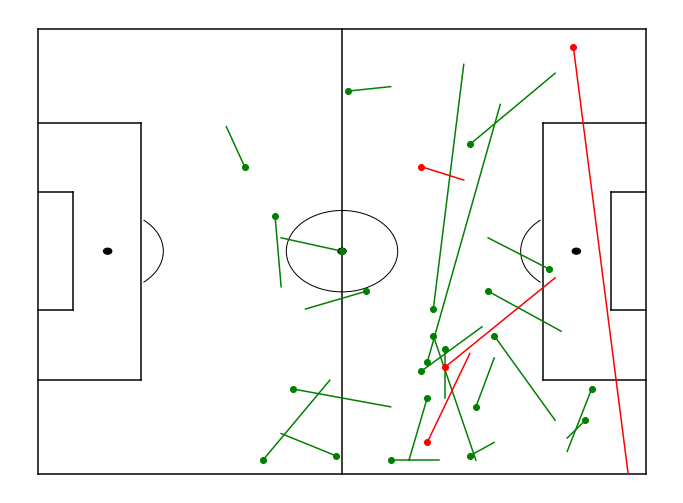

José Luis Morales


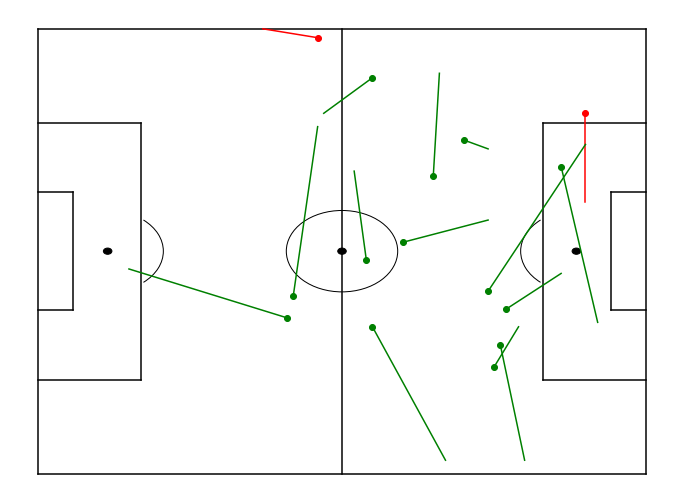

Coke


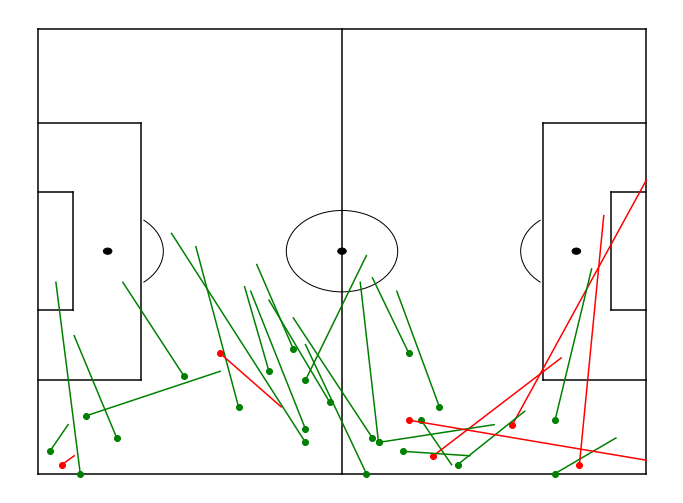

Sabin Merino


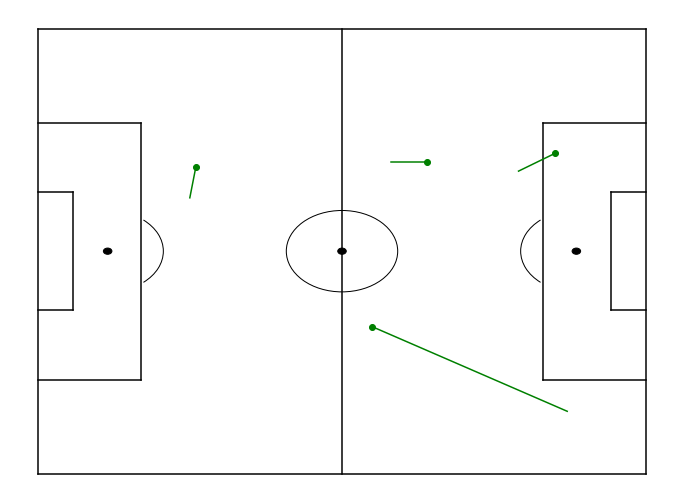

Rodrigo Tarín


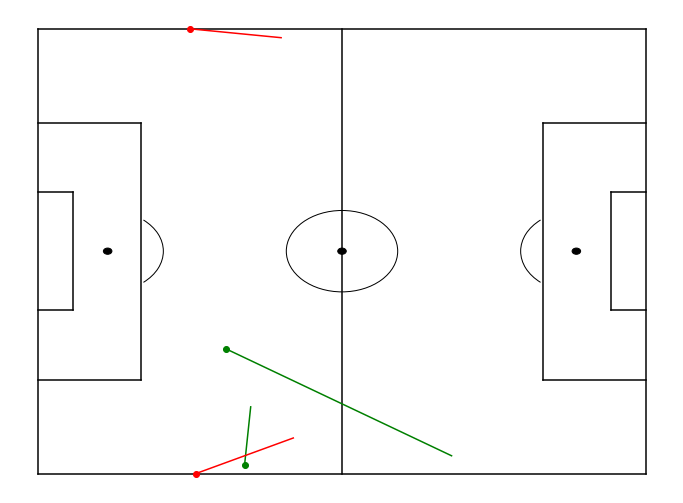

Roger Martí


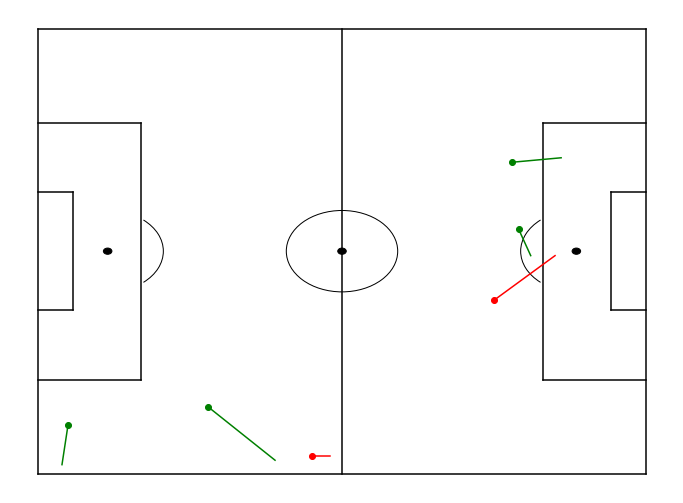

Juanfran


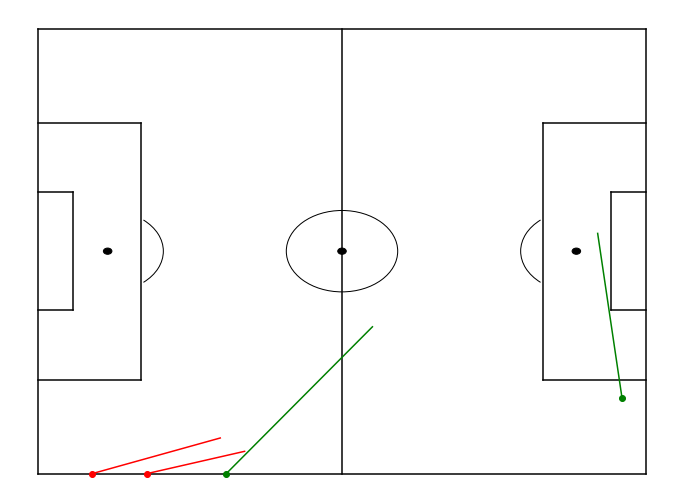

In [102]:
for i in passes['player'].unique():
    print(i)
    pasesJugador= passes.loc[passes['player'] == i]
    pasesJugador= pasesJugador.reset_index()
    pintar_pases()